The objective of this product is Need to Cluster cities on bases of their crime report

CRISP-ML(Q) process model describes six phases:

1. Business and Data Understanding
2. Data Preparation
3. Model Building
4. Model Evaluation

#Objective
minimize the crime rate on the bases of cities

#Success criteria
- **Business Success Criteria**: Reduce the Crime rate on the basis of cities

- **ML Success Criteria**: Achieve Silhoutte coefficient of atleast 0.6

- **Economic Success Criteria**: There is an increasing crime rate so need to be reduced

#PROPOSED PLANS:
Grouping the cities according to different Crime rate

#Data Dictionary
data set contains 49 cities record with 4 recorded features

#Discription Of Data
image.png

Lets Start It with importing some Libraries

In [6]:
!pip install feature_engine

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import preprocessing

In [8]:
data=pd.read_csv(r'/content/crime_data.csv')
data

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


Explorateory Data analysis(EDA)/Descriptive statistics
***1st Moment Business Decision (Measures of Central Tendency)***

1) Mean

2) Median

3) Mode

In [10]:
data.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Murder        7.788
Assault     170.760
UrbanPop     65.540
Rape         21.232
dtype: float64

In [11]:
data.median()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Murder        7.25
Assault     159.00
UrbanPop     66.00
Rape         20.10
dtype: float64

In [12]:
data.mode()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,2.1,120.0,66.0,14.9
1,Alaska,2.2,NaN,80.0,16.3
2,Arizona,2.6,NaN,NaN,NaN
3,Arkansas,6.0,NaN,NaN,NaN
4,California,9.0,NaN,NaN,NaN
5,Colorado,13.2,NaN,NaN,NaN
6,Connecticut,15.4,NaN,NaN,NaN
7,Delaware,NaN,NaN,NaN,NaN
8,Florida,NaN,NaN,NaN,NaN
9,Georgia,NaN,NaN,NaN,NaN


***2nd Moment Business Decision (Measures of Dispersion)***

1) Variance

2) Standard deviation

3) Range (maximum - minimum)

In [13]:
data.var()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Murder        18.970465
Assault     6945.165714
UrbanPop     209.518776
Rape          87.729159
dtype: float64

In [14]:
data.std()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Murder       4.355510
Assault     83.337661
UrbanPop    14.474763
Rape         9.366385
dtype: float64

***3rd Business Moment Decision (Skewness)***

Measure of asymmetry in the data distribution

In [15]:
data.skew()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Murder      0.393956
Assault     0.234410
UrbanPop   -0.226009
Rape        0.801200
dtype: float64

***4th Business Moment Decision (Kurtosis)***

Measure of peakedness - represents the overall spread in the data

In [16]:
data.kurt()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Murder     -0.827488
Assault    -1.053848
UrbanPop   -0.738360
Rape        0.353964
dtype: float64

***Descriptive Statistics and Data Distribution Function***

In [17]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Murder,50.0,7.788,4.355510,0.8,4.075,7.25,11.250,17.4
Assault,50.0,170.760,83.337661,45.0,109.000,159.00,249.000,337.0
UrbanPop,50.0,65.540,14.474763,32.0,54.500,66.00,77.750,91.0
Rape,50.0,21.232,9.366385,7.3,15.075,20.10,26.175,46.0


In [18]:
data.rename(columns={'Unnamed: 0':'USA_cities'},inplace=True)
data

,USA_cities,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


Check for Duplicate rows

In [19]:
duplicate=data.duplicated().sum()
duplicate

0

lets draw the co-relation between data

In [20]:
data.corr()

,Murder,Assault,UrbanPop,Rape
Murder,1.000000,0.801873,0.069573,0.563579
Assault,0.801873,1.000000,0.258872,0.665241
UrbanPop,0.069573,0.258872,1.000000,0.411341
Rape,0.563579,0.665241,0.411341,1.000000


Outliner Treatment

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


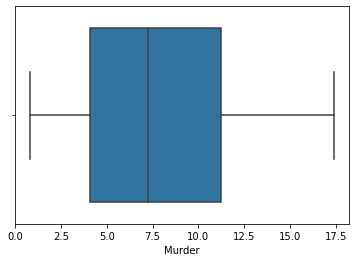

In [21]:
sns.boxplot(data.Murder)

No outliers are present in the Murder

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


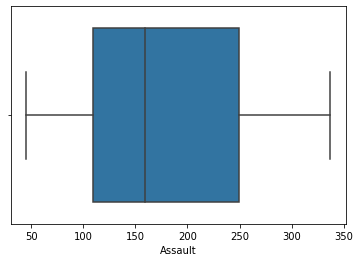

In [22]:
sns.boxplot(data.Assault)

No outliers are present in Assault

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


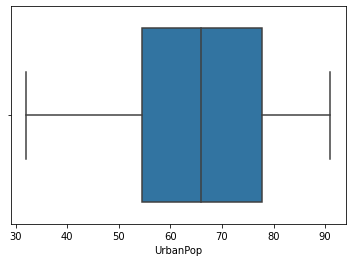

In [23]:
sns.boxplot(data.UrbanPop)

No outliers present in crime UrbanPop

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


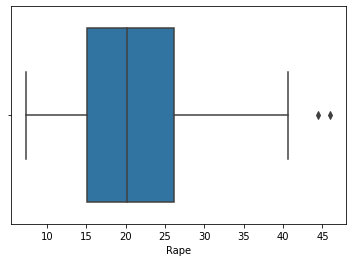

In [24]:
sns.boxplot(data.Rape)

As we Notice that there are some outliers in Rape dataset

lets handel the outlier using winsoriser

Lets devide categorigal and numerical data then perform because it helps  at last of clustering

In [25]:
data_cate=data.iloc[:,:1]
data_cate

,USA_cities
0,Alabama
1,Alaska
2,Arizona
3,Arkansas
4,California
5,Colorado
6,Connecticut
7,Delaware
8,Florida
9,Georgia


In [26]:
data_num=data.iloc[:,1:]
data_num

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
5,7.9,204,78,38.7
6,3.3,110,77,11.1
7,5.9,238,72,15.8
8,15.4,335,80,31.9
9,17.4,211,60,25.8


now we are going to treat the outlier using winsorisation

In [27]:
from feature_engine.outliers import Winsorizer

In [28]:
winsor_iqr=Winsorizer(capping_method='iqr',
                      tail="both",
                      fold=1.5,
                      variables=['Rape'])

In [29]:
data_num['Rape']=winsor_iqr.fit_transform(data_num[['Rape']])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


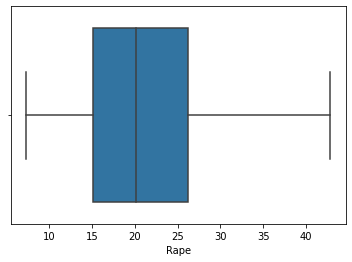

In [30]:
sns.boxplot(data_num.Rape)

lets create the dummy variable using one hot encoding

In [31]:
data_cate.dtypes

USA_cities    object
dtype: object

In [32]:
data_cate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   USA_cities  50 non-null     object
dtypes: object(1)
memory usage: 528.0+ bytes


In [33]:
print(data_cate.USA_cities.unique())
print('\n')
print(data_cate.USA_cities.value_counts())


['Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California' 'Colorado'
 'Connecticut' 'Delaware' 'Florida' 'Georgia' 'Hawaii' 'Idaho' 'Illinois'
 'Indiana' 'Iowa' 'Kansas' 'Kentucky' 'Louisiana' 'Maine' 'Maryland'
 'Massachusetts' 'Michigan' 'Minnesota' 'Mississippi' 'Missouri' 'Montana'
 'Nebraska' 'Nevada' 'New Hampshire' 'New Jersey' 'New Mexico' 'New York'
 'North Carolina' 'North Dakota' 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania'
 'Rhode Island' 'South Carolina' 'South Dakota' 'Tennessee' 'Texas' 'Utah'
 'Vermont' 'Virginia' 'Washington' 'West Virginia' 'Wisconsin' 'Wyoming']


Alabama           1
Pennsylvania      1
Nevada            1
New Hampshire     1
New Jersey        1
New Mexico        1
New York          1
North Carolina    1
North Dakota      1
Ohio              1
Oklahoma          1
Oregon            1
Rhode Island      1
Alaska            1
South Carolina    1
South Dakota      1
Tennessee         1
Texas             1
Utah              1
Vermont           1
Virginia         

so all are unique we chexked it through duplicate rows as we know dataset is of different cities 

In [34]:
data_cate=pd.get_dummies(data_cate,columns=['USA_cities'],drop_first=True)
data_cate.head()

,USA_cities_Alaska,USA_cities_Arizona,USA_cities_Arkansas,USA_cities_California,USA_cities_Colorado,USA_cities_Connecticut,USA_cities_Delaware,USA_cities_Florida,USA_cities_Georgia,USA_cities_Hawaii,...,USA_cities_South Dakota,USA_cities_Tennessee,USA_cities_Texas,USA_cities_Utah,USA_cities_Vermont,USA_cities_Virginia,USA_cities_Washington,USA_cities_West Virginia,USA_cities_Wisconsin,USA_cities_Wyoming
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Lets Check the dimension of our dataset

In [35]:
data_cate.shape

(50, 49)

Lets check skewness of data using histogram

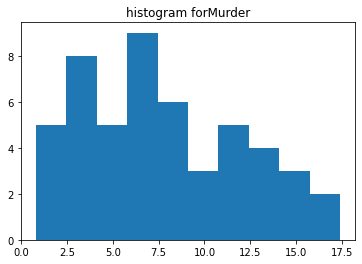

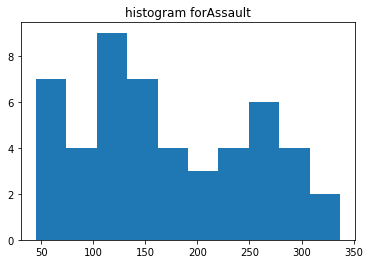

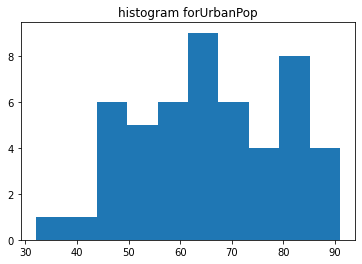

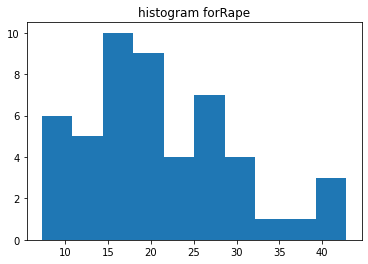

In [36]:
for i in data_num.columns:
  plt.hist(x=data_num[i])
  plt.title("histogram for"+str(i))
  plt.show()

built Q-Q plot \ probability plot

In [37]:
import scipy.stats as stats
import pylab
data_num.columns

Index(['Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')

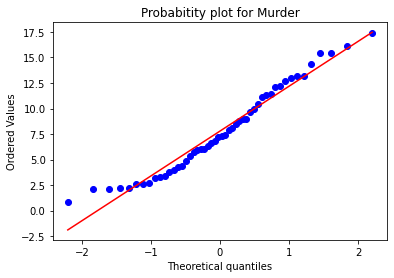

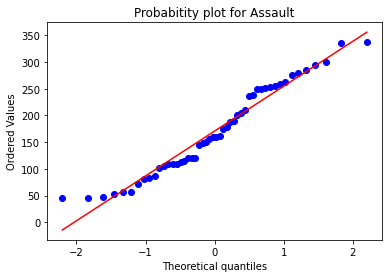

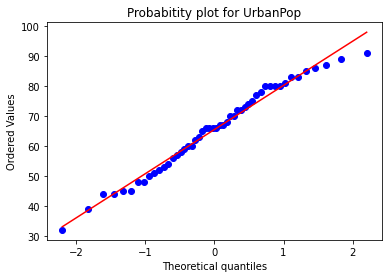

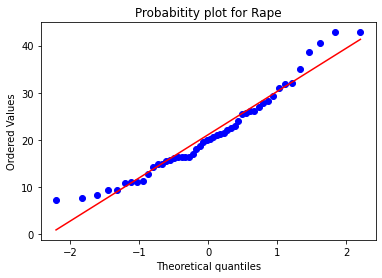

In [38]:
for i in data_num.columns:
  stats.probplot(data_num[i],dist="norm",plot=pylab)
  plt.title("Probabitity plot for "+str(i))
  plt.show()

data is normal for all lets move in to next level for clustering by concatinating the data

In [39]:
data1=pd.concat([data_cate,data_num],axis=1)
data1.head()

,USA_cities_Alaska,USA_cities_Arizona,USA_cities_Arkansas,USA_cities_California,USA_cities_Colorado,USA_cities_Connecticut,USA_cities_Delaware,USA_cities_Florida,USA_cities_Georgia,USA_cities_Hawaii,...,USA_cities_Vermont,USA_cities_Virginia,USA_cities_Washington,USA_cities_West Virginia,USA_cities_Wisconsin,USA_cities_Wyoming,Murder,Assault,UrbanPop,Rape
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,13.2,236,58,21.200
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,10.0,263,48,42.825
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,8.1,294,80,31.000
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,8.8,190,50,19.500
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,9.0,276,91,40.600


In [40]:
data1.shape

(50, 53)

In [41]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 53 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   USA_cities_Alaska          50 non-null     uint8  
 1   USA_cities_Arizona         50 non-null     uint8  
 2   USA_cities_Arkansas        50 non-null     uint8  
 3   USA_cities_California      50 non-null     uint8  
 4   USA_cities_Colorado        50 non-null     uint8  
 5   USA_cities_Connecticut     50 non-null     uint8  
 6   USA_cities_Delaware        50 non-null     uint8  
 7   USA_cities_Florida         50 non-null     uint8  
 8   USA_cities_Georgia         50 non-null     uint8  
 9   USA_cities_Hawaii          50 non-null     uint8  
 10  USA_cities_Idaho           50 non-null     uint8  
 11  USA_cities_Illinois        50 non-null     uint8  
 12  USA_cities_Indiana         50 non-null     uint8  
 13  USA_cities_Iowa            50 non-null     uint8  
 

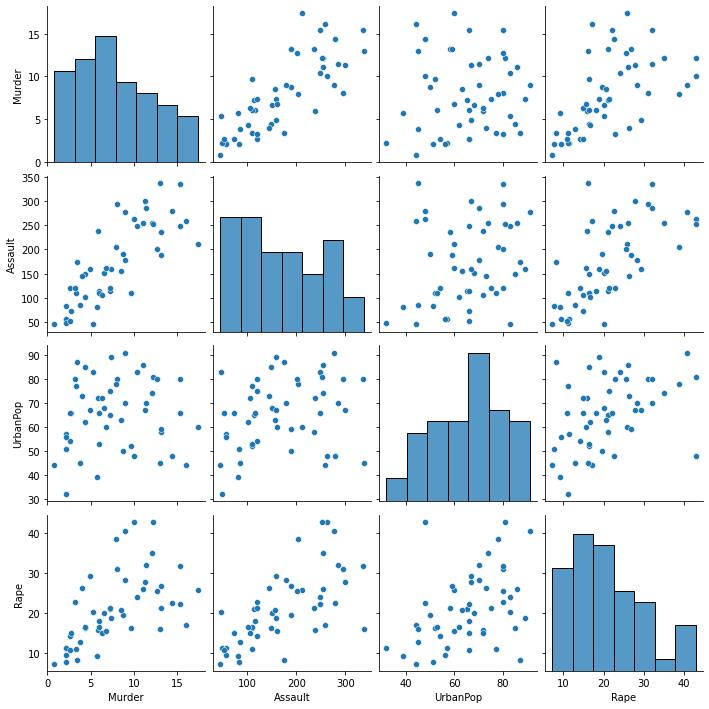

In [42]:
sns.pairplot(data_num)

In [43]:
data_num.corr()

,Murder,Assault,UrbanPop,Rape
Murder,1.000000,0.801873,0.069573,0.569678
Assault,0.801873,1.000000,0.258872,0.672108
UrbanPop,0.069573,0.258872,1.000000,0.419388
Rape,0.569678,0.672108,0.419388,1.000000


Now perform the agglomerative clustering so lets import libraries for it

In [44]:
from scipy.cluster.hierarchy import linkage,dendrogram
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

Lets plot dendrogram using these libraries

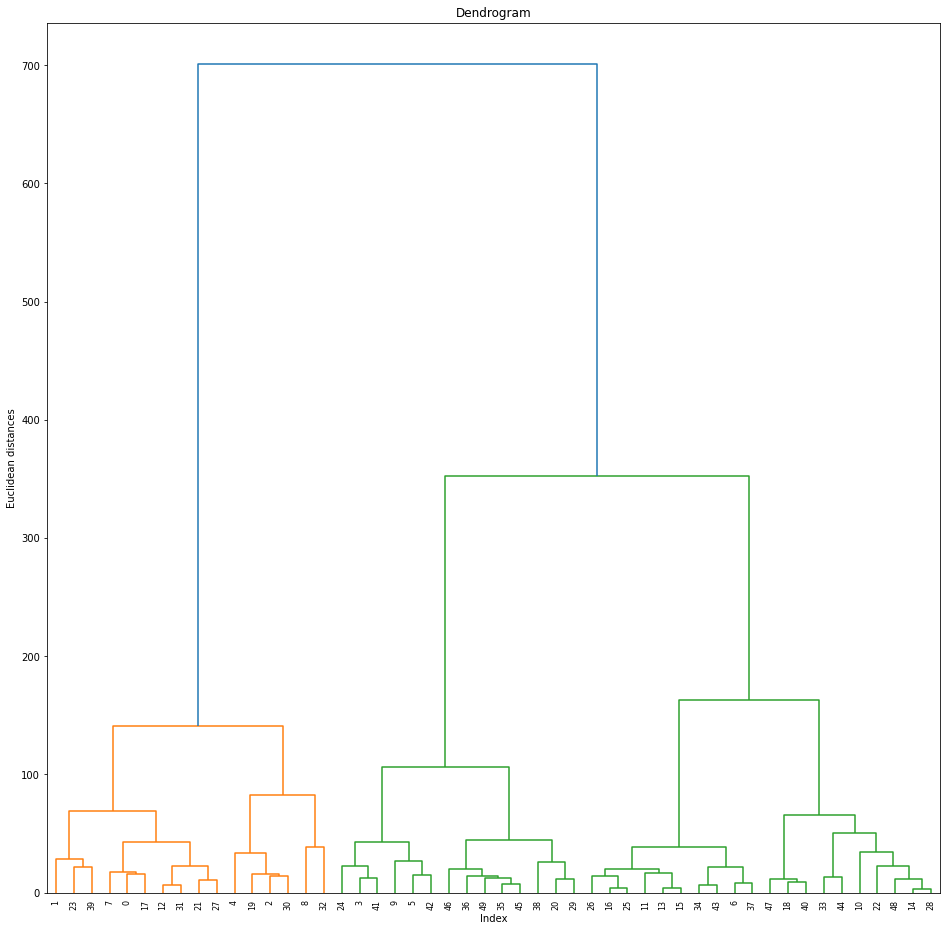

In [45]:
plt.figure(1,figsize=(16,16))
tree_ward=dendrogram(linkage(data1,method="ward"))

plt.title("Dendrogram")
plt.xlabel('Index')
plt.ylabel('Euclidean distances')
plt.show()

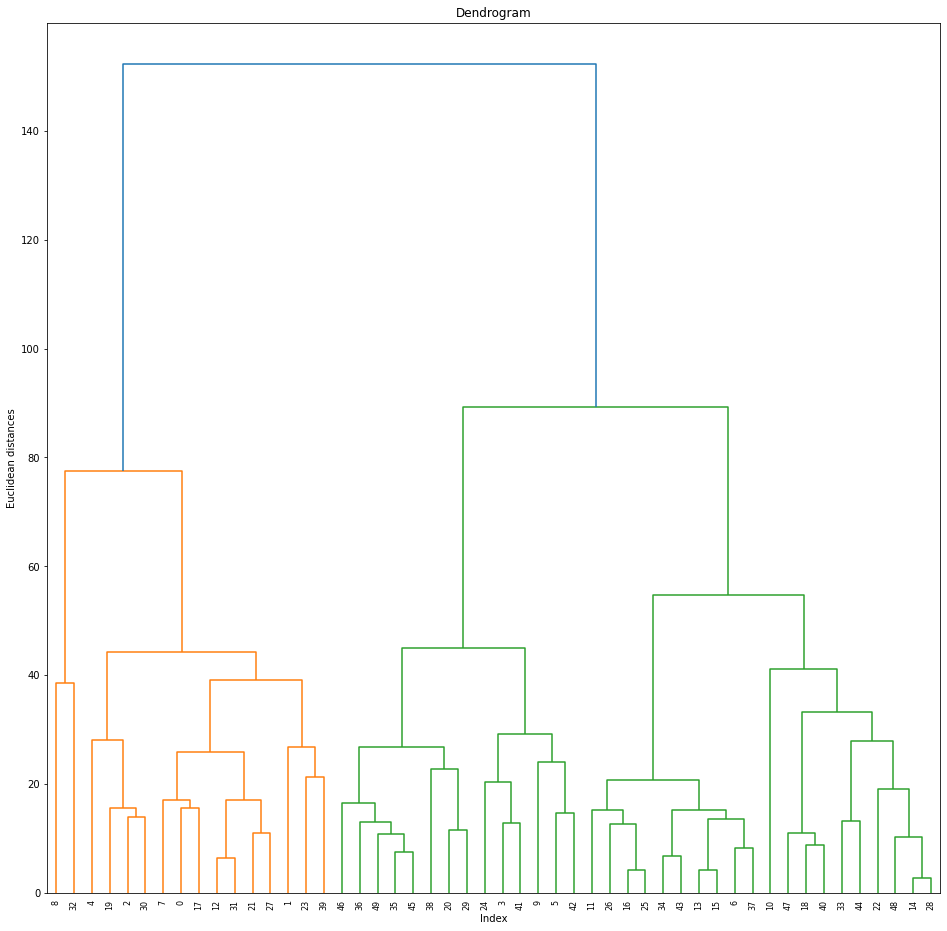

In [46]:
plt.figure(1,figsize=(16,16))
tree_average=dendrogram(linkage(data1,method="average"))
plt.title("Dendrogram")
plt.xlabel('Index')
plt.ylabel('Euclidean distances')
plt.show()


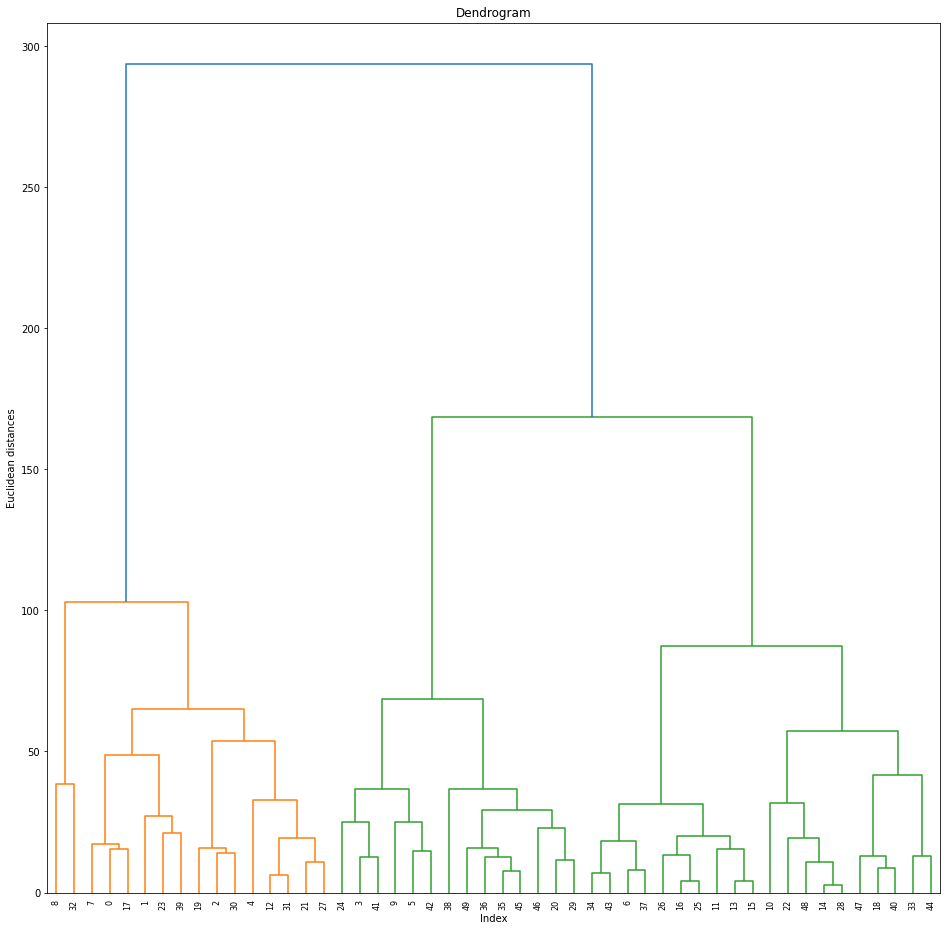

In [47]:
plt.figure(1,figsize=(16,16))
tree_complete=dendrogram(linkage(data1,method="complete"))
plt.title("Dendrogram")
plt.xlabel('Index')
plt.ylabel('Euclidean distances')
plt.show()


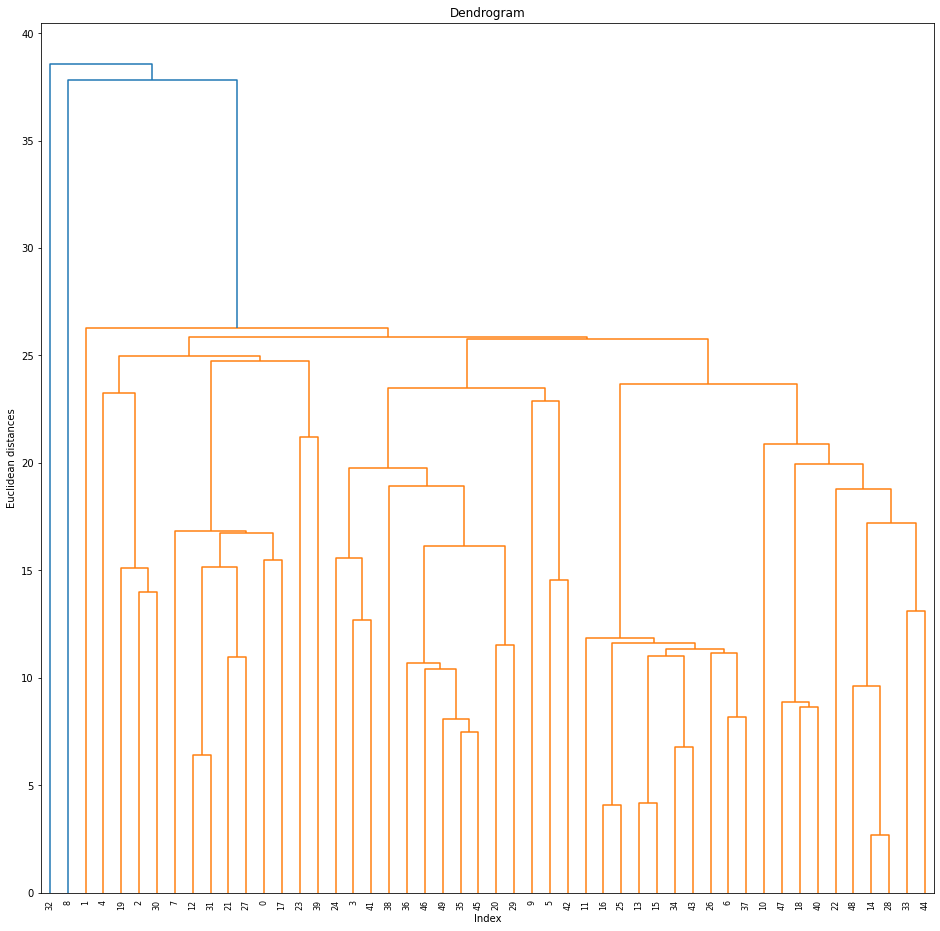

In [48]:
plt.figure(1,figsize=(16,16))
tree_single=dendrogram(linkage(data1,method="single"))
plt.title("Dendrogram")
plt.xlabel('Index')
plt.ylabel('Euclidean distances')
plt.show()


APPLYING AGGLOMERATIVE CLUSTERING BY CHOOSING THREE CLUSTERS FROM THE AVOBE DENDOGRAM

In [49]:
HC_WARD=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
Y_HC_WARD=HC_WARD.fit_predict(data1)
Y_HC_WARD

array([1, 1, 1, 2, 1, 2, 0, 1, 1, 2, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 2, 1,
       0, 1, 2, 0, 0, 1, 0, 2, 1, 1, 1, 0, 0, 2, 2, 0, 2, 1, 0, 2, 2, 0,
       0, 2, 2, 0, 0, 2])

In [50]:
HC_AVERAGE=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='average')
Y_HC_AVERAGE=HC_AVERAGE.fit_predict(data1)
Y_HC_AVERAGE

array([0, 0, 0, 2, 0, 2, 1, 0, 0, 2, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 2, 0,
       1, 0, 2, 1, 1, 0, 1, 2, 0, 0, 0, 1, 1, 2, 2, 1, 2, 0, 1, 2, 2, 1,
       1, 2, 2, 1, 1, 2])

In [51]:
HC_COMPLETE=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='complete')
Y_HC_COMPLETE=HC_COMPLETE.fit_predict(data1)
Y_HC_COMPLETE

array([0, 0, 0, 2, 0, 2, 1, 0, 0, 2, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 2, 0,
       1, 0, 2, 1, 1, 0, 1, 2, 0, 0, 0, 1, 1, 2, 2, 1, 2, 0, 1, 2, 2, 1,
       1, 2, 2, 1, 1, 2])

In [52]:
HC_SINGLE=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='single')
Y_HC_SINGLE=HC_SINGLE.fit_predict(data1)
Y_HC_SINGLE

array([0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

lets refer to ward linkage

In [53]:
HC_WARD.labels_

array([1, 1, 1, 2, 1, 2, 0, 1, 1, 2, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 2, 1,
       0, 1, 2, 0, 0, 1, 0, 2, 1, 1, 1, 0, 0, 2, 2, 0, 2, 1, 0, 2, 2, 0,
       0, 2, 2, 0, 0, 2])

In [54]:
cluster_labels_ward=pd.Series(HC_WARD.labels_)

ADD CLUSTER TO ORIGNAL DATASET

In [75]:
# data['Cluster_ward']=cluster_labels_ward
# data

lets refer to average

In [56]:
HC_AVERAGE.labels_

array([0, 0, 0, 2, 0, 2, 1, 0, 0, 2, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 2, 0,
       1, 0, 2, 1, 1, 0, 1, 2, 0, 0, 0, 1, 1, 2, 2, 1, 2, 0, 1, 2, 2, 1,
       1, 2, 2, 1, 1, 2])

In [57]:
cluster_labels_average=pd.Series(HC_AVERAGE.labels_)

ADD THIS TO DATA WITH CLUSTER_WARD

In [58]:
data['Cluster_average']=cluster_labels_average
data1

lets refer to complete

In [59]:
HC_COMPLETE.labels_

array([0, 0, 0, 2, 0, 2, 1, 0, 0, 2, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 2, 0,
       1, 0, 2, 1, 1, 0, 1, 2, 0, 0, 0, 1, 1, 2, 2, 1, 2, 0, 1, 2, 2, 1,
       1, 2, 2, 1, 1, 2])

In [60]:
cluster_labels_complete=pd.Series(HC_COMPLETE.labels_)

In [61]:
# data['Cluster_complete']=cluster_labels_complete
# data

lets refer to single

In [62]:
HC_SINGLE.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

In [63]:
cluster_labels_single=pd.Series(HC_SINGLE.labels_)

In [64]:
# data['Cluster_single']=cluster_labels_single
# data

First we will check it for ward method if it is good then ok otherwise look for another method

In [65]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [66]:
silhouette_score(data1,cluster_labels_ward)

0.5324256763687057

we got 53% of accuracy lets check for another method

In [67]:
silhouette_score(data1,cluster_labels_average)

0.5324256763687057

In [68]:
silhouette_score(data1,cluster_labels_single)

0.3045801286571391

In [69]:
silhouette_score(data1,cluster_labels_complete)

0.5324256763687057

we checked with all linkages and found that these method are giving us only 53% of accuracy so going to calculate by another method but lets go with ward linkage 

In [70]:
data2=data.sort_values(by='Cluster_ward',ascending=True)
data2

,USA_cities,Murder,Assault,UrbanPop,Rape,Cluster_ward
28,New Hampshire,2.1,57,56,9.5,0
22,Minnesota,2.7,72,66,14.9,0
26,Nebraska,4.3,102,62,16.5,0
44,Vermont,2.2,48,32,11.2,0
40,South Dakota,3.8,86,45,12.8,0
18,Maine,2.1,83,51,7.8,0
16,Kentucky,9.7,109,52,16.3,0
15,Kansas,6.0,115,66,18.0,0
14,Iowa,2.2,56,57,11.3,0
13,Indiana,7.2,113,65,21.0,0


In [71]:
data2.iloc[:,1:].groupby(data2.Cluster_ward).mean()

,Murder,Assault,UrbanPop,Rape,Cluster_ward
Cluster_ward,,,,,
0,4.270000,87.550000,59.750000,14.390000,0.0
1,11.812500,272.562500,68.312500,28.375000,1.0
2,8.214286,173.285714,70.642857,22.842857,2.0


In [72]:
cluster0=data2.loc[(data2.Cluster_ward==0),:]
cluster0

,USA_cities,Murder,Assault,UrbanPop,Rape,Cluster_ward
28,New Hampshire,2.1,57,56,9.5,0
22,Minnesota,2.7,72,66,14.9,0
26,Nebraska,4.3,102,62,16.5,0
44,Vermont,2.2,48,32,11.2,0
40,South Dakota,3.8,86,45,12.8,0
18,Maine,2.1,83,51,7.8,0
16,Kentucky,9.7,109,52,16.3,0
15,Kansas,6.0,115,66,18.0,0
14,Iowa,2.2,56,57,11.3,0
13,Indiana,7.2,113,65,21.0,0


In [73]:
cluster1=data2.loc[(data2.Cluster_ward==1),:]
cluster1

,USA_cities,Murder,Assault,UrbanPop,Rape,Cluster_ward
30,New Mexico,11.4,285,70,32.1,1
31,New York,11.1,254,86,26.1,1
27,Nevada,12.2,252,81,46.0,1
32,North Carolina,13.0,337,45,16.1,1
0,Alabama,13.2,236,58,21.2,1
19,Maryland,11.3,300,67,27.8,1
21,Michigan,12.1,255,74,35.1,1
17,Louisiana,15.4,249,66,22.2,1
12,Illinois,10.4,249,83,24.0,1
8,Florida,15.4,335,80,31.9,1


In [74]:
cluster2=data2.loc[(data2.Cluster_ward==2),:]
cluster2

,USA_cities,Murder,Assault,UrbanPop,Rape,Cluster_ward
45,Virginia,8.5,156,63,20.7,2
46,Washington,4.0,145,73,26.2,2
42,Texas,12.7,201,80,25.5,2
41,Tennessee,13.2,188,59,26.9,2
24,Missouri,9.0,178,70,28.2,2
36,Oregon,4.9,159,67,29.3,2
35,Oklahoma,6.6,151,68,20.0,2
29,New Jersey,7.4,159,89,18.8,2
20,Massachusetts,4.4,149,85,16.3,2
9,Georgia,17.4,211,60,25.8,2
